In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop('math_score', axis=1)

In [7]:
Y = df.math_score

In [9]:
def exploring_data(data):
    for colname, coltype in data.dtypes.iteritems():
        if coltype == object:
            print(f"Categories in ' {colname} variable:",data[colname].unique())
            
exploring_data(df)

Categories in ' gender variable: ['female' 'male']
Categories in ' race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in ' parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in ' lunch variable: ['standard' 'free/reduced']
Categories in ' test_preparation_course variable: ['none' 'completed']


In [23]:
# Column Transformation

num_features = X.select_dtypes(exclude="object").columns
cate_features = X.select_dtypes(include='object').columns

numeric_transformation = StandardScaler()
OHE_tranformation = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", OHE_tranformation, cate_features),
        ("StandardScaler", numeric_transformation, num_features)
    ]    
)

In [24]:
X = preprocessor.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [41]:
y_train.shape, y_test.shape

((800,), (200,))

### Evaluate Function to give all metrics after model training

In [45]:
def evalute_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_squared = r2_score(true, predicted)
    return mae, rmse, r2_squared 

In [75]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K_Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()  
}


model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evalute_model(y_train, y_train_predict)
    model_test_mae, model_test_rmse, model_test_r2 = evalute_model(y_test, y_test_predict)
    
    model_list.append(list(models.keys())[i])
    
    print(f"Model Performance for Training set of {list(models.keys())[i]}")
    print(f"Root Mean Squared Error: {round(model_train_rmse, 4)}")
    print(f"Mean Absolute Error: {round(model_train_mae, 4)}")
    print(f"R2 Score: {round(model_train_r2,4)}")
    
    print("-----------------------------------------------")
    
    print(f"Model Performance for Test set of {list(models.keys())[i]}")
    print(f"Root Mean Squared Error: {round(model_test_rmse, 4)}")
    print(f"Mean Absolute Error: {round(model_test_mae, 4)}")
    print(f"R2 Score: {round(model_test_r2, 4)} \n")
    r2_list.append(model_test_r2)
    
    print("="*35)
    print('\n')


Model Performance for Training set of Linear Regression
Root Mean Squared Error: 5.3252
Mean Absolute Error: 4.2693
R2 Score: 0.8742
-----------------------------------------------
Model Performance for Test set of Linear Regression
Root Mean Squared Error: 5.387
Mean Absolute Error: 4.2064
R2 Score: 0.8807 



Model Performance for Training set of Lasso
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R2 Score: 0.8071
-----------------------------------------------
Model Performance for Test set of Lasso
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 Score: 0.8253 



Model Performance for Training set of Ridge
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.265
R2 Score: 0.8743
-----------------------------------------------
Model Performance for Test set of Ridge
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 Score: 0.8806 



Model Performance for Training set of K_Neighbors Regressor
Root Mean Squared Error: 5.7133
Mean Absolute Er

In [87]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False, ignore_index=True)

,Model Name,R2 Score
0,Linear Regression,0.880745
1,Ridge,0.880593
2,Random Forest Regressor,0.855394
3,AdaBoost Regressor,0.851747
4,CatBoost Regressor,0.851632
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,K_Neighbors Regressor,0.784518
8,Decision Tree,0.733725


In [109]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model is {round(score, 2)}")

Accuracy of the model is 88.07


Text(0, 0.5, 'Predicted')

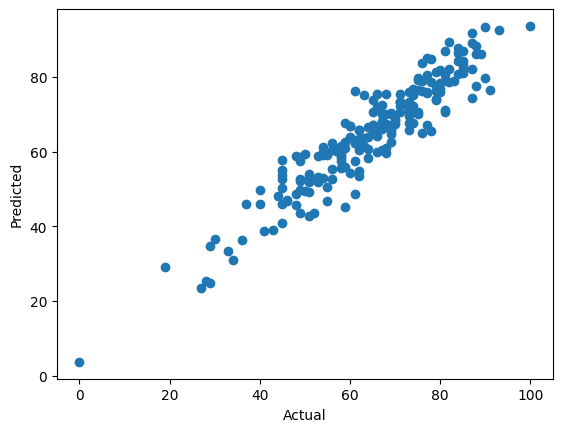

In [111]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0, 0.5, 'Predicted')

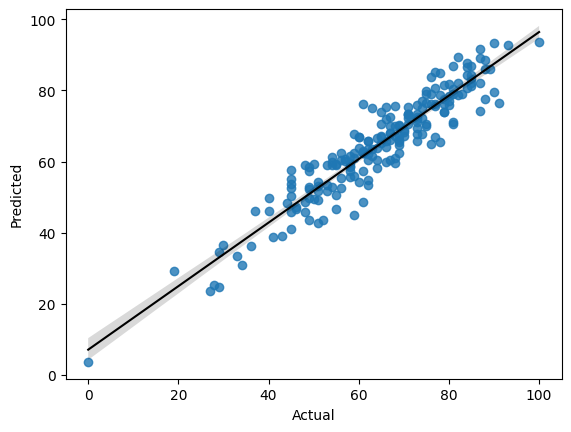

In [123]:
sn.regplot(y_test, y_pred, line_kws={'lw': 1.5, 'color': 'black'})
plt.xlabel("Actual")
plt.ylabel("Predicted")

**Difference between Actual and Predicted Values**

In [124]:
predicated_df = pd.DataFrame({
    'Actual Value' : y_test,
    'Predicted Value' : y_pred,
    'Difference' : y_test - y_pred
})

In [125]:
predicated_df

,Actual Value,Predicted Value,Difference
521,91,76.421875,14.578125
737,53,58.953125,-5.953125
740,80,76.921875,3.078125
660,74,76.921875,-2.921875
411,84,87.796875,-3.796875
...,...,...,...
408,52,43.531250,8.468750
332,62,62.281250,-0.281250
208,74,67.734375,6.265625
613,65,67.046875,-2.046875
